In [1]:
from __future__ import print_function
import sys
print(sys.version)

3.5.2 | packaged by conda-forge | (default, Jul 26 2016, 01:32:08) 
[GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]


In [21]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/pcombs/.local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['mpl', 'poly', 'logistic']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
run ../FitModelToGenes.py

4822
Optimization terminated successfully.
         Current function value: 0.449034
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                     T2   No. Observations:                 4822
Model:                          Logit   Df Residuals:                     4810
Method:                           MLE   Df Model:                           11
Date:                Thu, 29 Dec 2016   Pseudo R-squ.:                  0.7256
Time:                        11:28:41   Log-Likelihood:                -909.61
converged:                       True   LL-Null:                       -3315.3
                                        LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
twi            7.2309      1.154      6.267      0.000         4.969     9.492
bcdP2       -116.5641   

In [4]:
pred1 = Predictor(best_model, {})
pred2 = Predictor(best_model, {'bcdP':1.5, 'bcdP2':2.0})

In [5]:
pos_min = (pred1.params['bcdP2']*atlas_expr.ix[:, 'bcdP2', time_point]
           + pred1.params['bcdP']*atlas_expr.ix[:, 'bcdP', time_point]).argmin()
atlas_coords.ix[pos_min, 'X', time_point], min(atlas_coords[:, 'X', time_point])

(-209.12318, -212.8394)

In [6]:
(pred2.params['bcdP2']*atlas_expr.ix[:, 'bcdP2', time_point]
           + pred2.params['bcdP']*atlas_expr.ix[:, 'bcdP', time_point]).min()

-80.920237431484964

In [8]:
close('all')

(array([    8.,    24.,   387.,  2319.,  1280.,   568.,   374.,   295.,
          292.,   531.]),
 array([ -5.69408764,  -1.78482983,   2.12442798,   6.03368579,
          9.9429436 ,  13.85220142,  17.76145923,  21.67071704,
         25.57997485,  29.48923266,  33.39849047]),
 <a list of 10 Patch objects>)

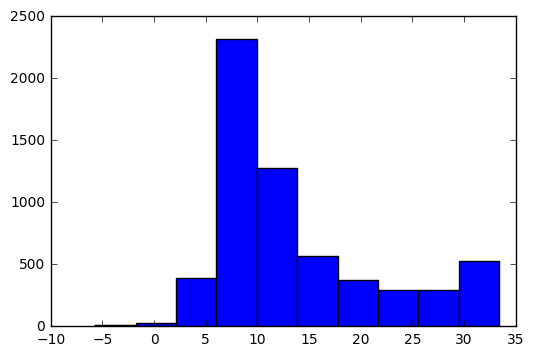

In [14]:
hist(pred1.params['bcdP2']*atlas_expr.ix[:, 'bcdP2', time_point]
           + pred1.params['bcdP']*atlas_expr.ix[:, 'bcdP', time_point])

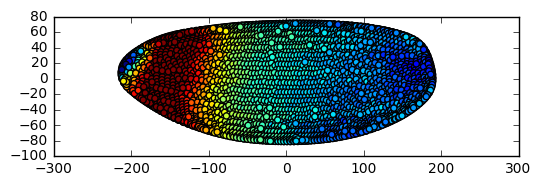

In [17]:
scatter(atlas_coords.ix[:, 'X', time_point], 
        atlas_coords.ix[:, 'Z', time_point], 
        c=(pred1.params['bcdP2']*atlas_expr.ix[:, 'bcdP2', time_point]
           + pred1.params['bcdP']*atlas_expr.ix[:, 'bcdP', time_point]),
       vmin=0, vmax=30)
gca().set_aspect(1)

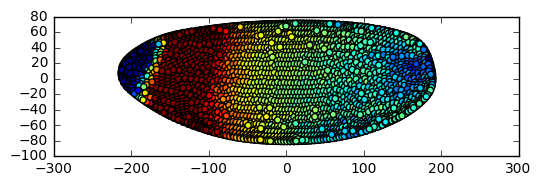

In [18]:
scatter(atlas_coords.ix[:, 'X', time_point], 
        atlas_coords.ix[:, 'Z', time_point], 
        c=(pred2.params['bcdP2']*atlas_expr.ix[:, 'bcdP2', time_point]
           + pred2.params['bcdP']*atlas_expr.ix[:, 'bcdP', time_point]),
       vmin=0, vmax=30)
gca().set_aspect(1)

In [34]:
run ../CompareAtlases.py


mel in region 0.4929745056497171 
sim in region 0.4249929718309859 
mel front 10 0.1744523701298702 
sim front 10 0.03752475070821531


0.725730093337


In [35]:
scatter(
     sim_atlas_pos.ix[:, 'X', mel_stage],
     sim_atlas_pos.ix[:, 'Z', mel_stage],
     c=(sim_expr_at_stage),
     cmap=pu.ISH, vmin=0,  s=40,
     edgecolor=(0, 0, 0, 0)
 )
title(mel_stage + '/' + sim_stage)
ax = gca()
ax.set_aspect(1)
ax.set_xlim(mel_atlas_pos.ix[:, 'X', mel_stage].min()-15,
             mel_atlas_pos.ix[:, 'X', mel_stage].max()+15)
ax.set_axis_bgcolor('gray')
pu.minimize_ink(ax)


In [36]:
scatter(
    mel_atlas_pos.ix[mel_order, 'X', mel_stage],
    mel_atlas_pos.ix[mel_order, 'Z', mel_stage],
    c=(mel_expr_at_stage.ix[mel_order] ),
    cmap=pu.ISH, vmin=0, s=40,
    edgecolor=(0, 0, 0, 0)
)
title(mel_stage + '/' + sim_stage)
ax = gca()
ax.set_aspect(1)
ax.set_axis_bgcolor('gray')
ax.set_xlim(mel_atlas_pos.ix[:, 'X', mel_stage].min()-15,
            mel_atlas_pos.ix[:, 'X', mel_stage].max()+15)
pu.minimize_ink(ax)
